In this homework, we'll be looking at the infamous Titanic dataset. It's become a canonical example for budding data scientists beginning machine learning and will be a good case study in using logistic regression.

From the project description on [Kaggle]('http://www.kaggle.com/c/titanic-gettingStarted'):
###Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

As with any start of a data science problem make sure you import your libraries!

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
#import additional libraries here if you need them
import seaborn as sns
from seaborn import plt
from patsy import dmatrices

In [8]:
%matplotlib inline

Kaggle has conveniently split the data already into a training set and test set. You can find them in the data folder.

In [9]:
#load data here
df = pd.read_csv('../data/titanic_training.csv')
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
#We want to drop the NA values
df = df.dropna()

While you could analyze this data many different ways, we'll focus on using logistic regression. For a recap of what logistic regression is look [here]('http://blog.yhathq.com/posts/logistic-regression-and-python.html').

Before creating your model, conduct some exploratory data analysis first. Make a few plots and comment on the results. What interesting patterns do you see?

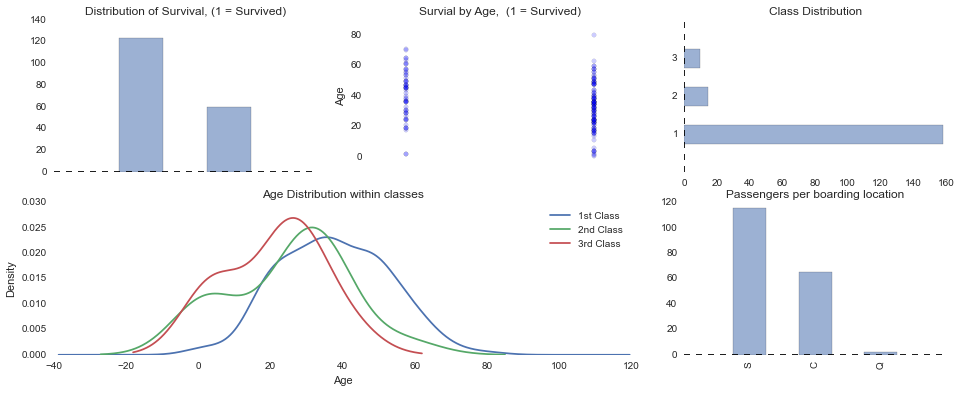

In [12]:
#Code for plot goes here
# specifies the parameters of our graphs
fig = plt.figure(figsize=(16,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.survived, df.age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survial by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
df.age[df.pclass == 1].plot(kind='kde')    
df.age[df.pclass == 2].plot(kind='kde')
df.age[df.pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

While these can better help us the nature of our dataset, let's also create a few plots that will hone in on our question of interest, namely predicting whether or not someone on the Titanic survived.

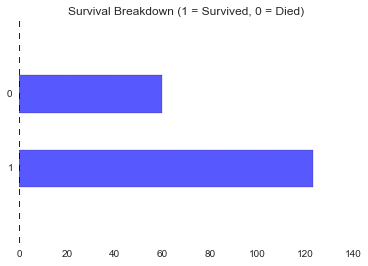

In [13]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

Let us also see what it looks like broken down by gender.

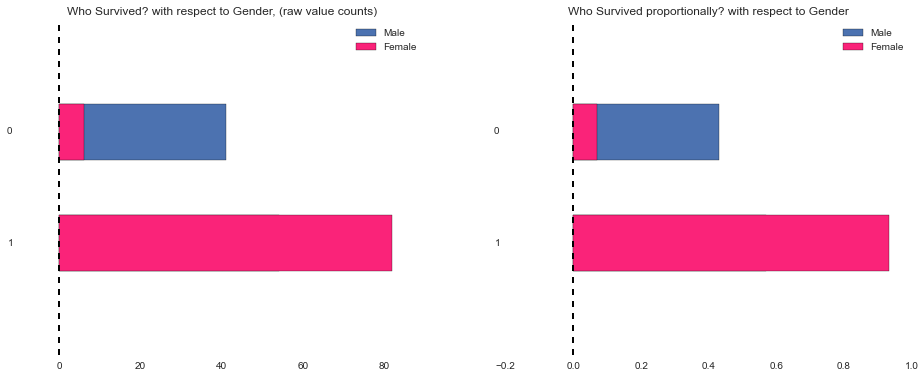

In [34]:
fig = plt.figure(figsize=(16,6))

# create a plot of two subsets, male and female, of the survived variable.
# After we do that we call value_counts() so it can be easily plotted as a bar graph. 
# 'barh' is just a horizontal bar graph
ax1 = fig.add_subplot(121)
df.survived[df.sex == 'male'].value_counts().plot(kind='barh',label='Male')
df.survived[df.sex == 'female'].value_counts().plot(kind='barh', color='#FA2379',label='Female')
ax1.set_ylim(-1, 2) 
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')


# adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df.survived[df.sex == 'male'].value_counts()/float(df.sex[df.sex == 'male'].size)).plot(kind='barh',label='Male')  
(df.survived[df.sex == 'female'].value_counts()/float(df.sex[df.sex == 'female'].size)).plot(kind='barh', color='#FA2379',label='Female')
ax2.set_ylim(-1, 2)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

Now let us go one step further and segment it by pclass (a metric used to signify a passenger's relative prestige)

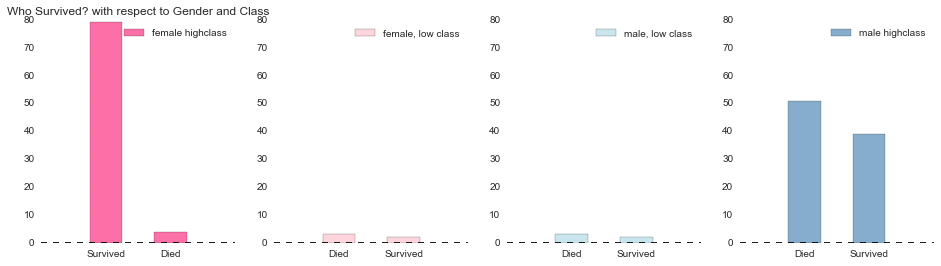

In [16]:
fig = plt.figure(figsize=(16,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.survived[df.sex == 'female'][df.pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.survived[df.sex == 'female'][df.pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.survived[df.sex == 'male'][df.pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.survived[df.sex == 'male'][df.pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

So now we have a better understanding of who died during the sinking of the Titanic. Now we can go and create better informed models.

Once you have explored the dataset, begin creating your model. You may want to do several iterations of this experimenting with different combinations of features. 

In [17]:
#Create your model here
# model formula
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict survived. The C() lets our 
# regression know that those variables are categorical.
formula = 'survived ~ C(pclass) + C(sex) + age + sibsp  + C(embarked)' 
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 

In [18]:
# instantiate our model
model = smf.logit(formula, df)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.441774
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  183
Model:                          Logit   Df Residuals:                      175
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 Mar 2015   Pseudo R-squ.:                  0.3017
Time:                        16:16:38   Log-Likelihood:                -80.845
converged:                       True   LL-Null:                       -115.78
                                        LLR p-value:                 1.574e-12
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.2584      0.808      5.270      0.000         2.675     5.842
C(pclass)[T.2]      -0.0369      0.800     -0.046      0.963        -1.604     1.530
C(pclass)[T.3]      -1.6803      0.941     -1.786      0.074        -3.524     0.164
C(sex)[T.male]      -2.8523      0.493     -5.781      0.000        -3.819    -1.885
C(embarked)[T.Q]    -1.6483      1.944     -0.848      0.396        -5.458     2.161
C(embarked)[T.S]    -0.4286      0.426     -1.007      0.314        -1.263     0.406
age                 -0.0357      0.014     -2.571      0.010        -0.063    -0.008
sibsp                0.1272      0.348      0.366      0.715        -0.555     0.809
====================================================================================
"""

Let's make a plot of our residuals to see how our model fares. 

Optimization terminated successfully.
         Current function value: 0.441774
         Iterations 7


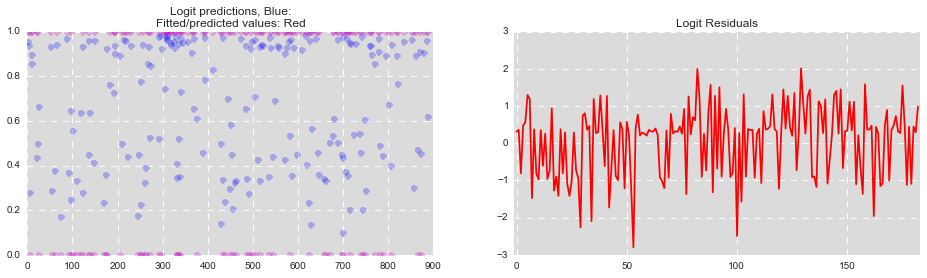

In [21]:
# create a regression freindly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=df, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# Plot Predictions Vs Actual
plt.figure(figsize=(16,4));
plt.subplot(121, axisbg="#DBDBDB")
# generate predictions from our fitted model
ypred = res.predict(x)
xindex = range(0, len(df))
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

#How do I test my results?
There are a few ways to evaluate your model. One is by comparing it to the test set and calculating a prediction accuracy. This method would work if you have the outcome variable in your test set. Unfortunately for this dataset, Kaggle has withheld that, probably to prevent overfitting. You could also interpret it further by delving deeper into the summary information the model provides. This could involve looking at confidence intervals and odd ratios for the coefficients. 

In [27]:
# instantiate our model
model = smf.logit(formula, df)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.441774
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  183
Model:                          Logit   Df Residuals:                      175
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 Mar 2015   Pseudo R-squ.:                  0.3017
Time:                        16:20:11   Log-Likelihood:                -80.845
converged:                       True   LL-Null:                       -115.78
                                        LLR p-value:                 1.574e-12
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.2584      0.808      5.270      0.000         2.675     5.842
C(pclass)[T.2]      -0.0369      0.800     -0.046      0.963        -1.604     1.530
C(pclass)[T.3]      -1.6803      0.941     -1.786      0.074        -3.524     0.164
C(sex)[T.male]      -2.8523      0.493     -5.781      0.000        -3.819    -1.885
C(embarked)[T.Q]    -1.6483      1.944     -0.848      0.396        -5.458     2.161
C(embarked)[T.S]    -0.4286      0.426     -1.007      0.314        -1.263     0.406
age                 -0.0357      0.014     -2.571      0.010        -0.063    -0.008
sibsp                0.1272      0.348      0.366      0.715        -0.555     0.809
====================================================================================
"""

In [28]:
#Evaluate results here
res.conf_int()

,0,1
Intercept,2.674529,5.842209
C(pclass)[T.2],-1.603929,1.530075
C(pclass)[T.3],-3.524460,0.163887
C(sex)[T.male],-3.819254,-1.885315
C(embarked)[T.Q],-5.457947,2.161312
C(embarked)[T.S],-1.262805,0.405530
age,-0.062931,-0.008486
sibsp,-0.554707,0.809196


In [29]:
#Odd Ratio: Take the exponential of each of the coefficients to generate the odds ratios.
#This tells you how a 1 unit increase or decrease in a variable affects the odds of surviving
print np.exp(res.params)

Intercept           70.694578
C(pclass)[T.2]       0.963747
C(pclass)[T.3]       0.186321
C(sex)[T.male]       0.057712
C(embarked)[T.Q]     0.192373
C(embarked)[T.S]     0.651396
age                  0.964922
sibsp                1.135694
dtype: float64


In [30]:
test_data = pd.read_csv("../data/titanic_test.csv")
test_data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
#test_data = test_data.dropna()
test_data = test_data.dropna(subset=['age'])

Remember that the output of logistic regression are probabilities. Typically a probability of > 0.5 corresponds to a "1" classification while a probability of < 0.5 corresponds to a "0" classification.

In [32]:
test_data['predicted_probabilities'] = res.predict(test_data)
test_data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,predicted_probabilities
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.040916
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.645288
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.076344
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.158829
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.816244


In [33]:
test_data['survived'] = map(lambda x: 1 if x > 0.5 else 0, test_data['predicted_probabilities'])
test_data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,predicted_probabilities,survived
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.040916,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.645288,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.076344,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.158829,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.816244,1


(Optional) Another way that you can evaluate, leveraging the fact that this is a Kaggle competition, is to upload your results directly to Kaggle and see how your results stack against all the others who have competed. To submit to Kaggle, you'll have to save the output of your predictions to a CSV file and upload that to the Kaggle Titanic contest page. You'll need a Kaggle account to do this. 

Go to the Kaggle page [here]('http://www.kaggle.com/c/titanic-gettingStarted').

If you do submit on Kaggle, post your Kaggle accuracy on Hipchat and see how you compare to your classmates!

*Note that the format for submission for Kaggle competitions is very strict. Make sure you submit it the way they want it.*

In [69]:
test_data['survived'].to_csv("hw3-logisticregression.csv")

Submitting to Kaggle gives us an **RMSE of 0.77033**. Not bad! Obviously we can use more robust models that we'll learn later in class to improve on this. 

#Notes:
- There is missing data that you may want to remove before you begin running your analysis.
- Beware of overfitting! Sometimes a good prediction accuracy with the test set may not necessarily translate to the best result you would get on Kaggle.
